# Grabbing the Data

The dataset below will be the one I use for this blog post

In [121]:
import pandas as pd
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df = pd.read_csv(url)

In [122]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,43200,RENT,NaN,VENTURE,B,1200,9.91,0,0.03,N,4
1,27,98000,RENT,3.0,EDUCATION,C,11750,13.47,0,0.12,Y,6
2,22,36996,RENT,5.0,EDUCATION,A,10000,7.51,0,0.27,N,4
3,24,26000,RENT,2.0,MEDICAL,C,1325,12.87,1,0.05,N,4
4,29,53004,MORTGAGE,2.0,HOMEIMPROVEMENT,A,15000,9.63,0,0.28,N,10


## Visualizations of the Data



For the dataset, I created two plots and one summary table in order to contextualize the data. 

In [123]:
from matplotlib import pyplot as plt
import seaborn as sns


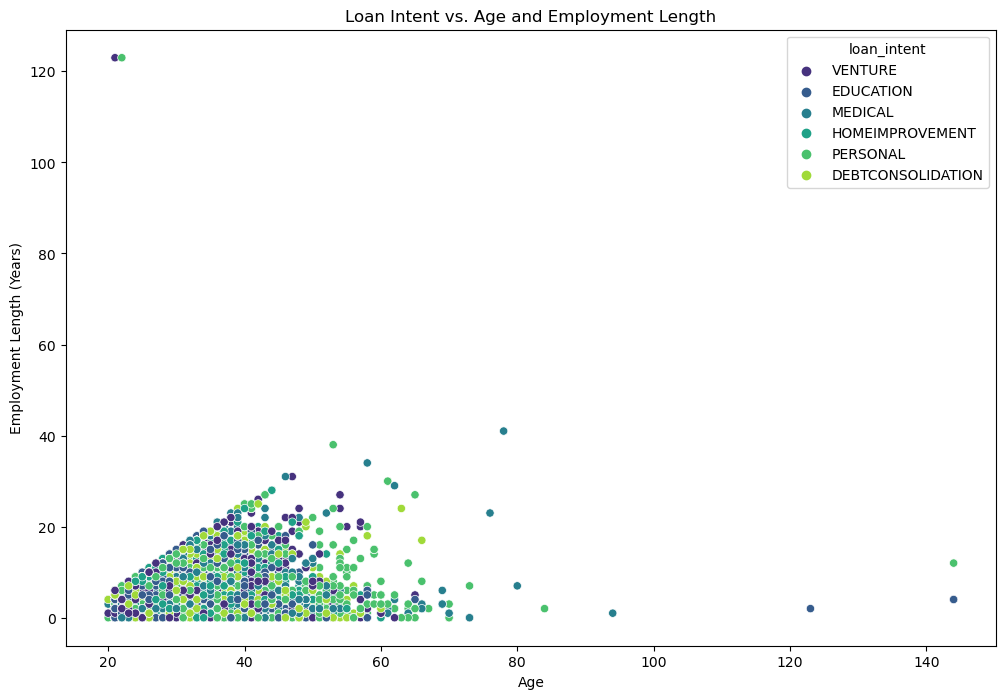

In [124]:
#| label: fig-scatter-loan
#| fig-cap: Loan Intent 

plt.figure(figsize=(12, 8))
sns.scatterplot(x='person_age', y='person_emp_length', hue='loan_intent', data=df, palette='viridis')
plt.title('Loan Intent vs. Age and Employment Length')
plt.xlabel('Age')
plt.ylabel('Employment Length (Years)')
plt.show()

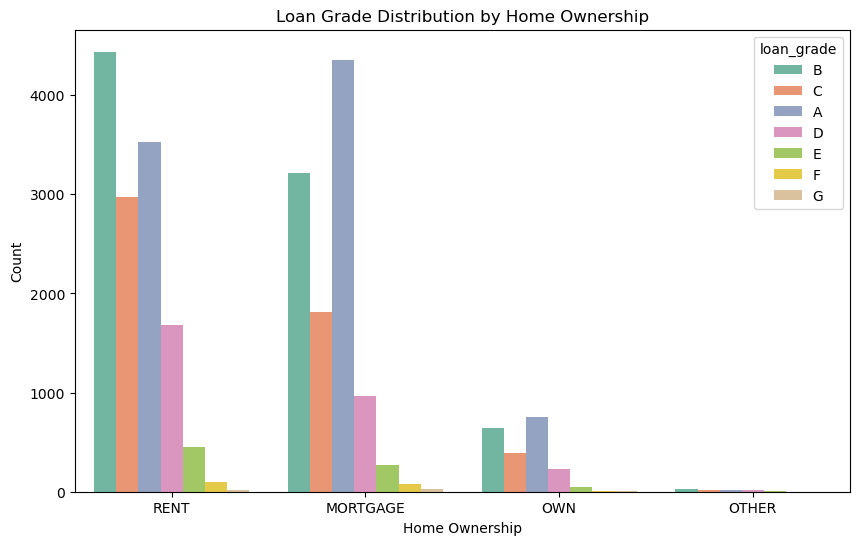

In [125]:
#| label: fig-scatter-loan-grade
#| fig-cap: Loan Grade Distribution by Home Ownership

plt.figure(figsize=(10, 6))
sns.countplot(x='person_home_ownership', hue='loan_grade', data=df, palette='Set2')
plt.title('Loan Grade Distribution by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

In [126]:
summary_table = df.groupby('loan_intent').agg({
    'loan_int_rate': 'mean',
    'loan_amnt': 'mean'
}).reset_index()

summary_table.rename(columns={
    'loan_int_rate': 'Average Interest Rate',
    'loan_amnt': 'Average Loan Amount'
}, inplace=True)

print(summary_table)


         loan_intent  Average Interest Rate  Average Loan Amount
0  DEBTCONSOLIDATION              10.983305          9620.901149
1          EDUCATION              10.965465          9460.015604
2    HOMEIMPROVEMENT              11.160075         10348.725017
3            MEDICAL              11.051946          9242.269907
4           PERSONAL              11.009814          9549.427178
5            VENTURE              10.940866          9516.417425


## Part C: Build a Model

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_all = pd.read_csv(url)

df = df_all.drop(['loan_grade', 'loan_status'], axis=1)  
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], drop_first=True)
df.dropna(inplace=True)

y = df_all.loc[df.index, 'loan_status']  

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)

selector = RFECV(estimator=logreg, step=1, cv=5)
selector = selector.fit(X_train_scaled, y_train)  # Fitting RFECV to the scaled training data


X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

model_selected = LogisticRegression(max_iter=1000)
model_selected.fit(X_train_selected, y_train)

selected_features = X_train.columns[selector.support_]

# Prediction
y_pred_selected = model_selected.predict(X_test_selected)
print(f"Optimal number of features: {selector.n_features_}")
print(classification_report(y_test, y_pred_selected))


Optimal number of features: 8
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3614
           1       0.68      0.48      0.56       968

    accuracy                           0.84      4582
   macro avg       0.77      0.71      0.73      4582
weighted avg       0.83      0.84      0.83      4582



In [130]:
feature_names = df.columns

selected_features = feature_names[selector.support_]

print("Selected features:", selected_features)


Selected features: Index(['loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')


In [189]:

X = df[selected_features]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MODEL HERE
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

## Trying to do threshold stuff here

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def linear_score(X, w):
    return X @ w


In [193]:
# Extracting weights 
w = model.coef_.flatten()  


In [194]:

scores = linear_score(X_train_selected, w) 



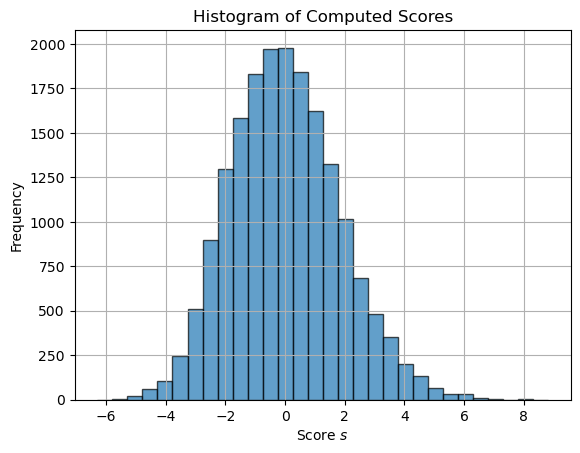

In [195]:

plt.hist(scores, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel(r"Score $s$")
plt.ylabel("Frequency")
plt.title("Histogram of Computed Scores")
plt.grid(True)
plt.show()


In [147]:
import numpy as np
import matplotlib.pyplot as plt

num_thresholds = 101
FPR = np.zeros(num_thresholds)
TPR = np.zeros(num_thresholds)

T = np.linspace(scores.min() - 0.1, scores.max() + 0.1, num_thresholds)

for i in range(num_thresholds):
    t = T[i]
    preds = scores >= t
    FPR[i] = ((preds == 1) & (y_train == 0)).sum() / (y_train == 0).sum()
    TPR[i] = ((preds == 1) & (y_train == 1)).sum() / (y_train == 1).sum()


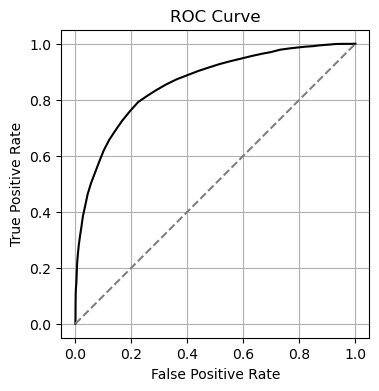

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(FPR, TPR, color="black")
ax.plot([0, 1], [0, 1], linestyle="--", color="grey")  
ax.set_aspect('equal')

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve")

plt.grid(True)
plt.show()


In [184]:
def profit_repaid(loan_amnt, loan_int_rate):
    return loan_amnt * (1 + 0.25 * loan_int_rate)**10 - loan_amnt

def profit_default(loan_amnt, loan_int_rate):
    return loan_amnt * (1 + 0.25 * loan_int_rate)**3 - 2 * loan_amnt


In [186]:

probabilities = model.predict_proba(X_train_scaled)[:, 1]


expected_gains = []
T = np.linspace(0, 1, 101)  

for t in T:
    preds = probabilities >= t
    individual_gains = np.where(preds,
                                profit_repaid(X_train['loan_amnt'].values, X_train['loan_int_rate'].values),
                                profit_default(X_train['loan_amnt'].values, X_train['loan_int_rate'].values))
    total_gain = np.sum(individual_gains)
    avg_gain = total_gain / len(X_train)
    expected_gains.append(avg_gain)




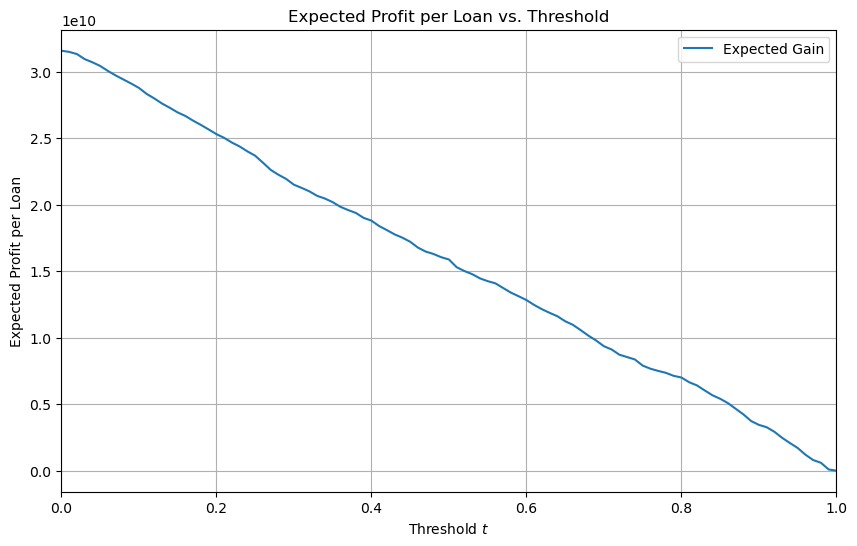

In [187]:
plt.figure(figsize=(10, 6))
plt.plot(T, expected_gains, label='Expected Gain')
plt.xlabel(r"Threshold $t$")
plt.ylabel("Expected Profit per Loan")
plt.title("Expected Profit per Loan vs. Threshold")
plt.xlim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

selected_features = ['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']


feature_combinations = [
    ['loan_amnt', 'loan_int_rate'],  
    ['loan_percent_income', 'person_home_ownership_RENT'],  
    selected_features  
]


In [72]:
results = {}

for features in feature_combinations:
    # Scale features
    X_scaled = scaler.fit_transform(df[features])
    
    LR = LogisticRegression(max_iter=10000)
    
    cv_scores_LR = cross_val_score(LR, X_scaled, y, cv=5)
    results[str(features)] = cv_scores_LR.mean()

for combo, score in results.items():
    print(f"Features: {combo}\nCV Score (mean accuracy): {score}\n")


Features: ['loan_amnt', 'loan_int_rate']
CV Score (mean accuracy): 0.7973108709793388

Features: ['loan_percent_income', 'person_home_ownership_RENT']
CV Score (mean accuracy): 0.8471203482091736

Features: ['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']
CV Score (mean accuracy): 0.848342893535451



## Define Profit Calculation Functions

# Predict Probability of Default

## Evaluate Different Thresholds